# Analyse en composantes principales avec Scikit Learn


http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

In [157]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Jeu de données

In [166]:
data = np.array([['V1',60.0,30.0,10.0],['V2',20.0,10.0,70.0],
                 ['V3',40.0,30.0,30.0],['V4',10.0,60.0,30.0]])
print(data)
print(data.dtype)

[['V1' '60.0' '30.0' '10.0']
 ['V2' '20.0' '10.0' '70.0']
 ['V3' '40.0' '30.0' '30.0']
 ['V4' '10.0' '60.0' '30.0']]
<U4


In [159]:
# Recuperation et conversion des donnees numeriques
X = data[:,1:].astype(np.float64)
print(X)
print(X.dtype)

[[ 60.  30.  10.]
 [ 20.  10.  70.]
 [ 40.  30.  30.]
 [ 10.  60.  30.]]
float64


## Analyse en composantes principales

### Modèle

In [167]:
# Mise en place des parametres de l'ACP
model_pca = PCA(n_components=3, svd_solver='full')
# Execution du modele
model_pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

### Axes principaux

In [162]:
# Axes principaux
print(model_pca.components_)

[[-0.51526788 -0.29088612  0.806154  ]
 [-0.63337641  0.76292328 -0.12954687]
 [-0.57735027 -0.57735027 -0.57735027]]


### Pourcentage de variance expliquée par chaque axe

In [163]:
# Ratio de variance expliquee par chaque axe
expl_variance = model_pca.explained_variance_ratio_
print(expl_variance)

[  6.18888948e-01   3.81111052e-01   7.21011684e-34]


### Coordonnées des individus sur les axes factoriels

In [164]:
# Coordonnees des individus sur les axes factoriels
individuals = model_pca.transform(X)
print(individuals)

[[ -3.35965015e+01  -1.60864878e+01  -4.44089210e-16]
 [  4.12011763e+01  -1.37827091e+01  -2.22044605e-15]
 [ -7.16806381e+00  -6.00989694e+00   0.00000000e+00]
 [ -4.36611055e-01   3.58790938e+01   3.10862447e-15]]


### Représentations graphiques

Représentation des individus sur les deux premiers axes principaux

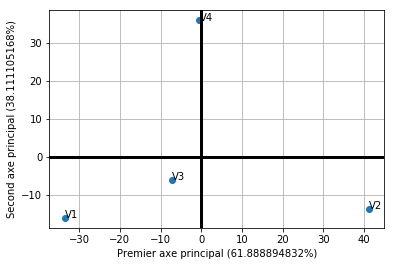

In [173]:
# Graphe des individus surl les 2 premiers axes principaux
plt.scatter(individuals[:,0], individuals[:,1])
plt.xlabel("Premier axe principal (" + 
           str(expl_variance[0] * 100.0) + "%)")
plt.ylabel("Second axe principal (" \
           + str(expl_variance[1] * 100.0) + "%)")

# Affichage des modeles de voiture
for i, txt in enumerate(data[:,0]):
    plt.annotate(txt, (individuals[i,0],\
                       individuals[i,1]))

plt.axhline(linewidth=3, color='black') # affichage de l'axe des abscisses
plt.axvline(linewidth=3, color='black') # affichage de l'axe des ordonnees
plt.grid(True) # affichage d'une grille
plt.savefig('acp_voitures_individus_python.png')
plt.show()